In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

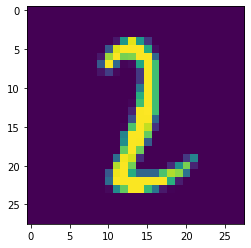

In [10]:
plt.imshow(x_train[1270])

In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
28 * 28

784

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 2s 903us/step - loss: 0.2228 - accuracy: 0.9358 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 2/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.0937 - accuracy: 0.9723 - val_loss: 0.0853 - val_accuracy: 0.9728
Epoch 3/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0633 - val_accuracy: 0.9804


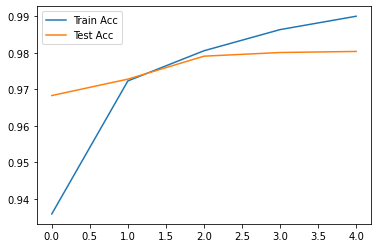

In [18]:
plt.plot(model.history.history['accuracy'], label='Train Acc')
plt.plot(model.history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.show()

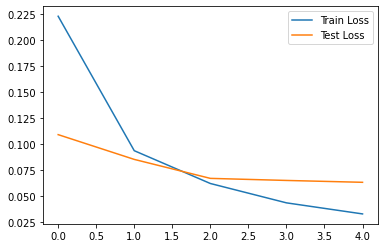

In [19]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()